In [7]:
# library(poLCA)
suppressWarnings(library(tidyverse))
suppressWarnings(library(caret))
suppressWarnings(library(ggcorrplot))
suppressWarnings(library(GGally))
suppressWarnings(library(randomForest))
suppressWarnings(library(e1071))
suppressWarnings(library(ROCR))
suppressWarnings(library(pROC))
suppressWarnings(library(RCurl))
library(XML)
library(RCurl)
library(tidyLPA)

# Download

Example code found here:

https://rpubs.com/raviolli77/352956



In [8]:
UCI_data_URL <- getURL('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')
names <- c('id_number', 'diagnosis', 'radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst')
breast_cancer <- read.table(textConnection(UCI_data_URL), sep = ',', col.names = names)

breast_cancer$id_number <- NULL

In [9]:
head(breast_cancer)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [10]:
names(breast_cancer)

[1] "diagnosis"               "radius_mean"            
 [3] "texture_mean"            "perimeter_mean"         
 [5] "area_mean"               "smoothness_mean"        
 [7] "compactness_mean"        "concavity_mean"         
 [9] "concave_points_mean"     "symmetry_mean"          
[11] "fractal_dimension_mean"  "radius_se"              
[13] "texture_se"              "perimeter_se"           
[15] "area_se"                 "smoothness_se"          
[17] "compactness_se"          "concavity_se"           
[19] "concave_points_se"       "symmetry_se"            
[21] "fractal_dimension_se"    "radius_worst"           
[23] "texture_worst"           "perimeter_worst"        
[25] "area_worst"              "smoothness_worst"       
[27] "compactness_worst"       "concavity_worst"        
[29] "concave_points_worst"    "symmetry_worst"         
[31] "fractal_dimension_worst"

In [11]:
features <- names[!names %in% c("id_number", "diagnosis")]
features

[1] "radius_mean"             "texture_mean"           
 [3] "perimeter_mean"          "area_mean"              
 [5] "smoothness_mean"         "compactness_mean"       
 [7] "concavity_mean"          "concave_points_mean"    
 [9] "symmetry_mean"           "fractal_dimension_mean" 
[11] "radius_se"               "texture_se"             
[13] "perimeter_se"            "area_se"                
[15] "smoothness_se"           "compactness_se"         
[17] "concavity_se"            "concave_points_se"      
[19] "symmetry_se"             "fractal_dimension_se"   
[21] "radius_worst"            "texture_worst"          
[23] "perimeter_worst"         "area_worst"             
[25] "smoothness_worst"        "compactness_worst"      
[27] "concavity_worst"         "concave_points_worst"   
[29] "symmetry_worst"          "fractal_dimension_worst"

In [60]:
pdf("breast_ggpairs.pdf")
ggpairs(breast_cancer[features])
dev.off()

pdf 
  2

In [78]:
bc_cor <- cor(breast_cancer[features])

In [88]:
bc_pmat <- cor_pmat(breast_cancer[features])

In [90]:
pdf("breast_corr.pdf")
ggcorrplot(bc_cor, hc.order=TRUE, type="lower", p.mat = bc_pmat)
dev.off()

pdf 
  2

In [92]:
bc_pmat

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,0.000000e+00,2.360374e-15,0.000000e+00,0.000000e+00,4.312577e-05,2.414237e-38,1.907202e-77,4.350747e-141,4.064650e-04,2.795452e-14,⋯,0.000000e+00,4.724257e-13,0.000000e+00,3.767447e-269,4.272881e-03,6.642109e-25,5.736690e-42,1.901795e-101,8.533044e-05,8.664424e-01
texture_mean,2.360374e-15,0.000000e+00,7.041961e-16,4.124850e-15,5.776966e-01,1.095581e-08,1.690749e-13,9.153223e-13,8.882926e-02,6.845986e-02,⋯,4.257446e-18,1.169260e-221,1.189172e-18,3.314843e-17,6.468085e-02,1.520262e-11,2.207201e-13,6.485832e-13,1.220181e-02,4.407832e-03
perimeter_mean,0.000000e+00,7.041961e-16,0.000000e+00,0.000000e+00,6.108608e-07,1.146652e-47,1.322967e-90,1.047656e-160,1.115686e-05,2.388803e-10,⋯,0.000000e+00,1.500703e-13,0.000000e+00,4.216389e-270,3.135667e-04,1.562701e-30,4.542259e-49,2.557288e-113,5.566284e-06,2.243291e-01
area_mean,0.000000e+00,4.124850e-15,0.000000e+00,0.000000e+00,2.165664e-05,4.469262e-37,2.437500e-80,1.491019e-141,2.925202e-04,6.001522e-12,⋯,0.000000e+00,2.735088e-12,5.092299e-313,2.692041e-313,3.164270e-03,3.702441e-22,1.902705e-39,9.154479e-93,5.926491e-04,9.291138e-01
smoothness_mean,4.312577e-05,5.776966e-01,6.108608e-07,2.165664e-05,0.000000e+00,3.403822e-72,4.370346e-41,5.043590e-47,7.795253e-48,1.686424e-53,⋯,2.872918e-07,3.904321e-01,7.988709e-09,6.559140e-07,7.445938e-131,5.577522e-33,1.165176e-27,7.891840e-38,1.315197e-22,3.283071e-37
compactness_mean,2.414237e-38,1.095581e-08,1.146652e-47,4.469262e-37,3.403822e-72,0.000000e+00,1.623002e-188,1.240590e-146,1.524162e-57,2.249807e-49,⋯,1.662882e-43,1.973675e-09,1.061520e-54,6.213422e-39,2.073505e-49,1.223697e-172,3.035807e-137,8.028072e-137,4.871583e-39,8.675067e-81
concavity_mean,1.907202e-77,1.690749e-13,1.322967e-90,2.437500e-80,4.370346e-41,1.623002e-188,0.000000e+00,6.788791e-235,1.965478e-37,1.477216e-16,⋯,4.604740e-81,2.745785e-13,1.277016e-95,3.305398e-77,1.492487e-29,5.513553e-106,1.718834e-189,6.953777e-169,2.061434e-24,7.550607e-40
concave_points_mean,4.350747e-141,9.153223e-13,1.047656e-160,1.491019e-141,5.043590e-47,1.240590e-146,6.788791e-235,0.000000e+00,1.676645e-31,6.308951e-05,⋯,4.301616e-146,1.044326e-12,1.550513e-164,2.566686e-133,4.193120e-30,1.250033e-74,7.022171e-105,3.662252e-219,1.607955e-20,9.288141e-20
symmetry_mean,4.064650e-04,8.882926e-02,1.115686e-05,2.925202e-04,7.795253e-48,1.524162e-57,1.965478e-37,1.676645e-31,0.000000e+00,4.069094e-34,⋯,8.218478e-06,3.061401e-02,1.286025e-07,2.127128e-05,1.410241e-26,4.325870e-33,1.684120e-27,4.760254e-27,6.826161e-85,3.977303e-28
fractal_dimension_mean,2.795452e-14,6.845986e-02,2.388803e-10,6.001522e-12,1.686424e-53,2.249807e-49,1.477216e-16,6.308951e-05,4.069094e-34,0.000000e+00,⋯,8.310116e-10,2.220576e-01,7.996703e-07,2.208198e-08,3.813754e-38,5.761178e-31,1.811646e-17,2.604068e-05,2.692768e-16,1.738522e-111


In [108]:
bc_subset <- c('radius_mean', 'texture_mean', 'smoothness_mean','compactness_mean', 'texture_se') # sklearn dendrogram

Warning message:
“Using shapes for an ordinal variable is not advised”


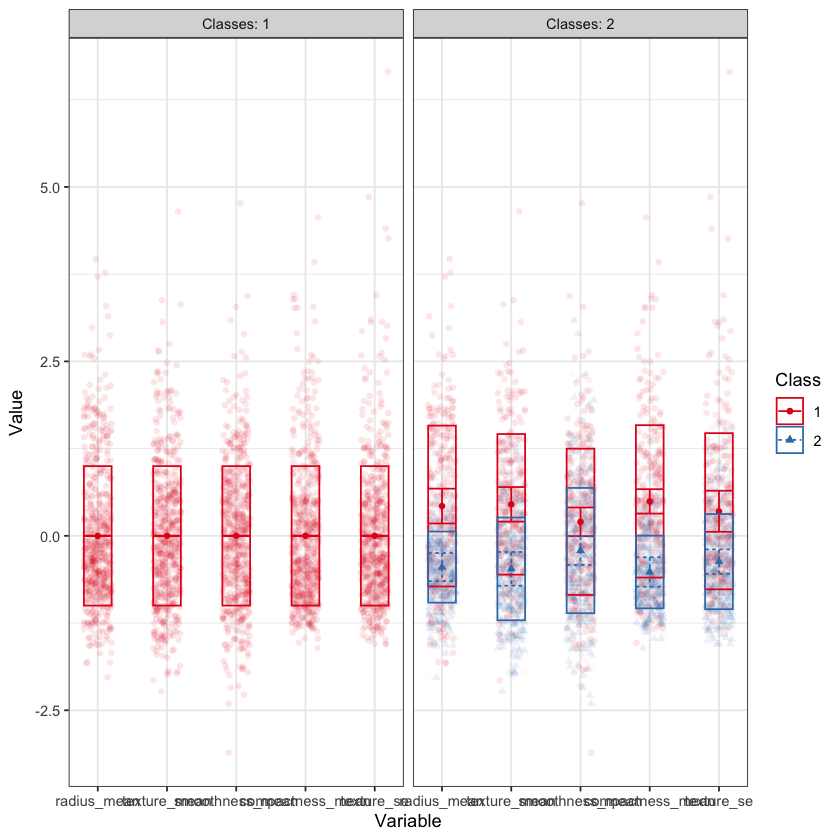

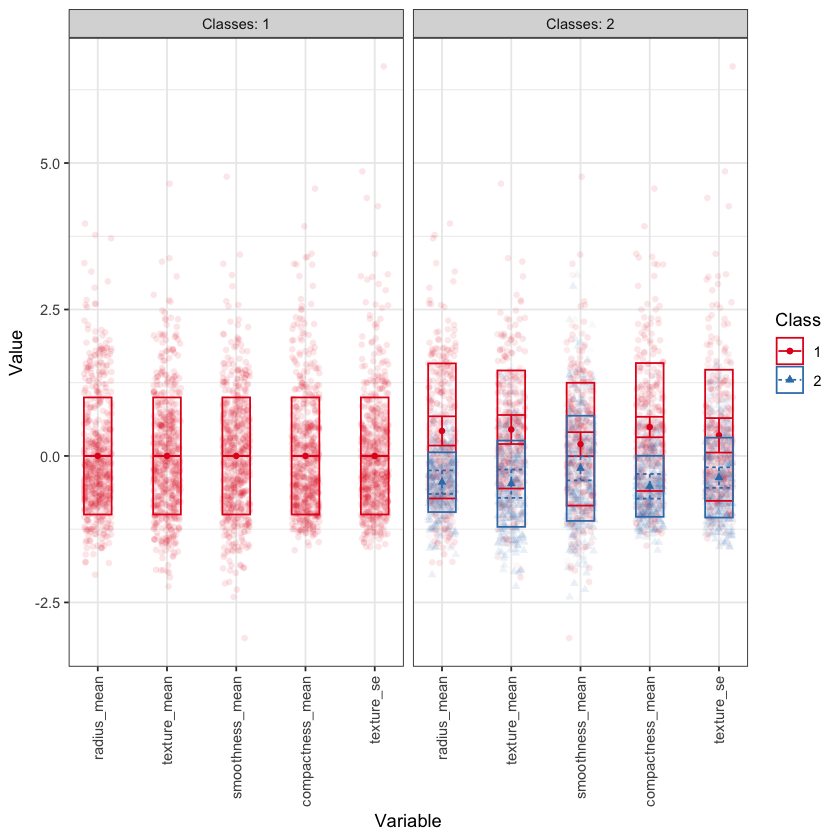

In [123]:
#png("bivariate.png", res=45)
breast_cancer  %>%
  select(all_of(features)) %>%
  #single_imputation() %>%
  subset(select = bc_subset) %>%
  scale() %>%
  estimate_profiles(n_profiles=1:2,
                   variances = "varying",
                   covariances = "varying") %>%
  #estimate_profiles(n_profiles = 1:2, models = 1:2) %>%
  # plot_profiles() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) %>%
  plot_profiles() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
  # plot_bivariate()
#dev.off()

In [125]:
membership <- breast_cancer  %>%
  select(all_of(features)) %>%
  #single_imputation() %>%
  subset(select = bc_subset) %>%
  scale() %>%
  estimate_profiles(n_profiles=2,
                   variances = "varying",
                   covariances = "varying") %>%
  #estimate_profiles(n_profiles = 1:2, models = 1:2) %>%
  # plot_profiles() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) %>%
  # plot_profiles() + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
  get_data()

In [129]:
membership$diagnosis <- breast_cancer$diagnosis
write.csv(membership, "lpa_membership.csv", row.names=FALSE)

In [114]:
breast_cancer  %>%
  select(all_of(features)) %>%
  subset(select=bc_subset) %>%
  scale() %>%
  estimate_profiles(1:10, variances = "varying",
                   covariances = "varying") %>%
  #get_fit() %>%
  compare_solutions()

Model,Classes,LogLik,AIC,AWE,BIC,CAIC,CLC,KIC,SABIC,ICL,Entropy,prob_min,prob_max,n_min,n_max,BLRT_val,BLRT_p
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,1,-3653.723,7347.446,7619.201,7434.324,7454.324,7309.446,7370.446,7370.833,-7434.324,1.0000000,1.0000000,1.0000000,1.00000000,1.0000000,NA,NA
6,2,-3446.923,6975.845,7535.706,7153.945,7194.945,6895.183,7019.845,7023.788,-7286.814,0.6688578,0.8918266,0.9125850,0.49912127,0.5008787,413.60062,0.00990099
6,3,-3353.721,6831.442,7678.693,7100.762,7162.762,6708.831,6896.442,6903.940,-7279.013,0.6949072,0.7630665,0.9287270,0.15817223,0.4270650,186.40388,0.00990099
6,4,-3302.941,6771.881,7906.534,7132.423,7215.423,6607.313,6857.881,6868.936,-7337.829,0.7157402,0.7460788,0.8986821,0.11247803,0.4165202,101.56020,0.00990099
6,5,-3274.501,6757.003,8179.112,7208.767,7312.767,6550.421,6864.003,6878.614,-7455.220,0.7092054,0.7337372,0.8900206,0.11950791,0.2899824,56.87845,0.05940594
6,6,-3247.770,6745.539,8455.019,7288.524,7413.524,6497.030,6873.539,6891.706,-7528.324,0.7452636,0.7499383,0.9150251,0.06854130,0.2829525,53.46384,0.17821782
6,7,-3205.125,6702.251,8699.143,7336.457,7482.457,6411.771,6851.251,6872.974,-7580.169,0.7604408,0.6980040,0.8725110,0.06151142,0.2425308,85.28851,0.00990099
6,8,-3179.413,6692.826,8977.109,7418.254,7585.254,6360.399,6862.826,6888.105,-7646.771,0.7865330,0.7605548,0.9095090,0.01933216,0.2161687,51.42436,0.12871287
6,9,-3120.520,6617.039,9188.698,7433.689,7621.689,6242.679,6808.039,6836.874,-7632.541,0.8199589,0.7699317,0.9768202,0.01933216,0.2231986,117.78702,0.00990099
